In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df= pd.read_csv('/content/drive/MyDrive/PJ/csv/tipos/Orange.csv')

Mounted at /content/drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3012 entries, 0 to 3011
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cliente         3012 non-null   object 
 1   precio_venta    2996 non-null   float64
 2   peso            3012 non-null   float64
 3   t_id            3012 non-null   object 
 4   fecha_venta     3006 non-null   object 
 5   hora_venta      3006 non-null   object 
 6   tipo            3012 non-null   object 
 7   fecha_recogida  3012 non-null   object 
 8   hora_recogida   3012 non-null   object 
 9   lote            3012 non-null   object 
 10  marca           3012 non-null   object 
 11  coste_inicial   2923 non-null   float64
 12  proveedor       3012 non-null   object 
dtypes: float64(3), object(10)
memory usage: 306.0+ KB


In [ ]:
print(df.describe())

       precio_venta         peso  coste_inicial
count   2996.000000  3012.000000    2923.000000
mean       3.515439   300.810762       2.005925
std        0.700019   100.014920       0.498050
min        1.200107   -54.406728       0.387682
25%        3.050111   233.469137       1.663779
50%        3.512319   300.002995       2.019804
75%        3.989451   367.317198       2.348023
max        6.068812   634.240348       3.438946


In [ ]:
print(df.head())

         cliente  precio_venta        peso              t_id fecha_venta  \
0  CompraMaestra      4.140688  233.358976   Orange00100.png  2022/09/04   
1  CompraMaestra      3.100906  492.894740  Orange001066.png  2022/09/28   
2  CompraMaestra      3.854770  378.256016  Orange001083.png  2022/09/20   
3  CompraMaestra      3.391255  407.258648  Orange001099.png  2022/09/28   
4  CompraMaestra      4.082344   34.833458  Orange001120.png  2022/09/02   

  hora_venta    tipo fecha_recogida hora_recogida                      lote  \
0      21:00  Orange     2022/09/04         11:00    U82G78M69L48M48L46V78M   
1      17:00  Orange     2022/09/28         12:00  U82G78M69L48M48R54J80T71   
2      23:00  Orange     2022/09/20         23:00  U82G78M69L48M48T51J80T71   
3      08:00  Orange     2022/09/28         00:00  U82G78M69L48M48U57J80T71   
4      02:00  Orange     2022/09/01         18:00  U82G78M69L48M49N48J80T71   

               marca  coste_inicial                            prove

In [ ]:
df['coste_inicial'] = df['coste_inicial'].round(2)
df['peso'] = df['peso'].round(2)
df['precio_venta'] = df['precio_venta'].round(2)

df.head()

# **PESO**

Empezamos analizando los PESOS

In [ ]:
peso_minimo = df["peso"].min()
peso_maximo = df["peso"].max()
negativos = df[df["peso"] < 0]
nulos = df[df["peso"].isnull()]

print(f"Peso mínimo: {peso_minimo}")
print(f"Peso máximo: {peso_maximo}")
print(f"Total negativos: {len(negativos)}")
print(f"Total nulos: {len(nulos)}")

Peso mínimo: -54.40672830515439
Peso máximo: 634.2403479838964
Total negativos: 6
Total nulos: 0


In [ ]:
df[df["peso"] < 0]["marca"].value_counts()


,count
marca,
DulceEncanto,1
JugosoAroma,1
CosechaDivina,1
EmbrujoFrutal,1
DulzuraSilvestre,1
FrutaDulce,1


In [ ]:
df[df["peso"] < 0]["proveedor"].value_counts()

,count
proveedor,
Tractores Eficientes Delgado,1
Agricultura Inteligente TechCultivos,1
EcoFungicidas Morales,1
Apícola EcoMiel,1
Semillas Innovadoras S.A.,1
Fitosanitarios BioPro,1


In [ ]:
df[df["peso"] < 0]["lote"].unique()

array(['U82G78M69L48M54R56J80T71', 'U82G78M69L48M49Q50J80T71',
       'U82G78M69L48M57Q51J80T71', 'U82G78M69L48S48J80T71',
       'U82G78M69L48N51T52J80T71', 'U82G78M69L48M55P54J80T71'],
      dtype=object)

Revisamos si es una marca o proveedor en específico que tiene negativos pero resultan ser los lotes U82G78M69L48.

In [ ]:
print(negativos["peso"])

23     -23.569350
715    -10.991354
743    -27.462949
961    -54.406728
1633   -10.713055
2542   -16.299895
Name: peso, dtype: float64


Para la poca cantidad que son los eliminamos, no tienen sentido tampoco en positivo.

In [ ]:
filas_peso_negativo = df[df["peso"] < 0]
print(filas_peso_negativo)

                         cliente  precio_venta       peso              t_id  \
23                 CompraMaestra      3.825972 -23.569350  Orange001668.png   
715           Alimentación Total      3.553421 -10.991354  Orange001152.png   
743           Alimentación Total      3.759710 -27.462949  Orange001953.png   
961                 CompraRápida      2.784313 -54.406728    Orange0070.png   
1633            Comercial Fresco      5.159231 -10.713055  Orange002384.png   
2542  Central de Abastos Central      3.550237 -16.299895  Orange001746.png   

     fecha_venta hora_venta    tipo fecha_recogida hora_recogida  \
23    2022/09/10      12:00  Orange     2022/09/10         09:00   
715   2022/09/09      08:00  Orange     2022/09/09         01:00   
743   2022/09/24      06:00  Orange     2022/09/24         05:00   
961   2022/09/11      19:00  Orange     2022/09/11         13:00   
1633  2022/10/01      08:00  Orange     2022/10/01         02:00   
2542  2022/09/02      09:00  Orange   

Reemplazamos todos los valores negativos por NaN


In [ ]:
df["peso"] = df["peso"].mask(df["peso"] < 0)

In [ ]:
print("Cantidad de pesos mayores de 150 g:", len(df[df['peso'] > 150]))
print("Peso máximo:", df.loc[df['peso'] > 150, 'peso'].max())

Cantidad de pesos mayores de 150 g: 2821
Peso máximo: 634.2403479838964


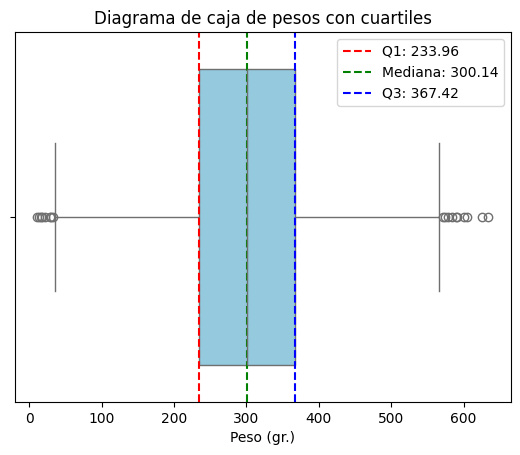

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["peso"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de pesos con cuartiles')
plt.xlabel('Peso (gr.)')
plt.legend()

plt.show()

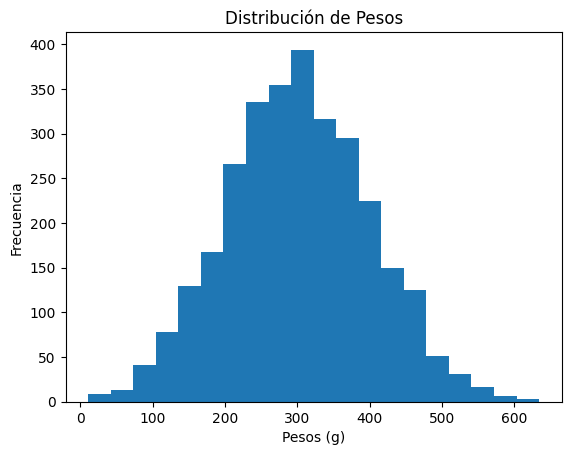

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["peso"].dropna(), bins=20)
plt.title('Distribución de Pesos')
plt.xlabel('Pesos (g)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
Q1_pe = df["peso"].quantile(0.25)
Q3_pe = df["peso"].quantile(0.75)
IQR_pe = Q3_pe - Q1_pe
outliers_pe = df[df["peso"] > Q3_pe + 1.5 * IQR_pe]

print("Total outliers:", outliers_pe["peso"].count())
print(Q1_pe)
print(Q3_pe)
print(IQR_pe)

Total outliers: 10
233.9623771239844
367.4195193938414
133.45714226985703


El peso medio de una naranja ronda entre los 150 y 200 gramos.

In [ ]:
print(df[['peso', 't_id']].dropna(subset=['peso']).sort_values(by='peso'))

            peso              t_id
2475   11.065738  Orange002227.png
71     12.579704   Orange00390.png
1664   16.018481   Orange00506.png
1376   17.415206  Orange002590.png
1652   22.050752  Orange002841.png
...          ...               ...
1541  590.336961   Orange00244.png
1380  601.098964  Orange002668.png
1258  605.030737  Orange001919.png
1744  625.709842  Orange002965.png
1197  634.240348   Orange00381.png

[3006 rows x 2 columns]


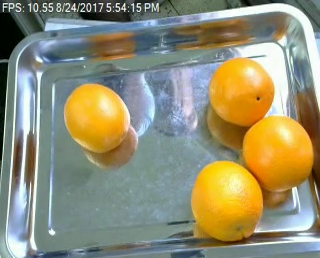

In [ ]:
from IPython.display import Image, display

image_path = '/content/drive/MyDrive/PJ/archive/Orange/Orange002227.png'

try:
    display(Image(filename=image_path))
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}. Por favor, verifica la ruta de tu imagen.")
except Exception as e:
    print(f"Ocurrió un error al cargar la imagen: {e}")

El peso más bajo es 11.065738gr y muestra 4 naranjas.
Este peso seria imposible incluso para una sola naranja.   

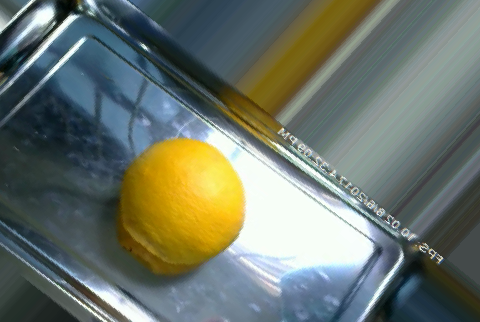

In [ ]:
from IPython.display import Image, display

image_path = '/content/drive/MyDrive/PJ/archive/Orange/Orange00246.png'

try:
    display(Image(filename=image_path))
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}. Por favor, verifica la ruta de tu imagen.")
except Exception as e:
    print(f"Ocurrió un error al cargar la imagen: {e}")

En la imagen de arrriba tenemos una sola naranja con un peso de 386.125536 gr.

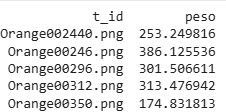

En todas las imagenes de la tabla podemos ver una sola naranja y los pesos que muestran son muy superiores a la primera imagen mostrada.

Dejo los pesos aquí y veremos más adelante. Empiezo con coste inicial.


# **COSTE INICIAL**

In [ ]:
coste_inicial_min = df["coste_inicial"].min()
coste_inicial_max = df["coste_inicial"].max()
negativos_coste = df[df["coste_inicial"] < 0]
nulos_coste = df[df["coste_inicial"].isnull()]

print(f"Coste inicial mínimo: {coste_inicial_min}")
print(f"Coste inicial máximo: {coste_inicial_max}")
print(f"Coste inicial negativos: {len(negativos_coste)}")
print(f"Coste inicial nulos: {len(nulos_coste)}")

Coste inicial mínimo: 0.3876821734433313
Coste inicial máximo: 3.4389461862528714
Coste inicial negativos: 0
Coste inicial nulos: 89


No encontramos negativos y los costes iniciales van desde los 0.38 hasta los 3.43


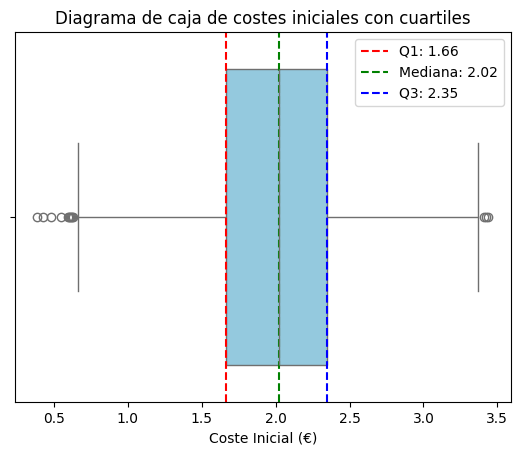

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["coste_inicial"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de costes iniciales con cuartiles')
plt.xlabel('Coste Inicial (€)')
plt.legend()

plt.show()

En el gráfico se ven muchos outliers. Vamos a ver en otro gráfico como visualizamos los datos.

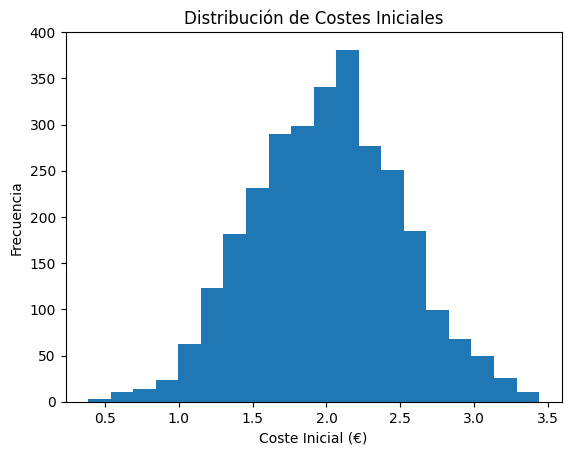

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["coste_inicial"].dropna(), bins=20)
plt.title('Distribución de Costes Iniciales')
plt.xlabel('Coste Inicial (€)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
Q1_ci = df["coste_inicial"].quantile(0.25)
Q3_ci = df["coste_inicial"].quantile(0.75)
IQR_ci = Q3_ci - Q1_ci
outliers_ci = df[df["coste_inicial"] > Q3_ci + 1.5 * IQR_ci]

print("Total outliers:", outliers_ci["coste_inicial"].count())
print(Q1_ci)
print(Q3_ci)
print(IQR_ci)

Total outliers: 3
1.663779447778424
2.348023180129969
0.6842437323515451


Una vez analizados los costes iniciales y viendo que tenemos 3 outliers y el resto de costes se mueven en la media deben de ser excepciones por algún motivo de calidad, tamaño o imperfecciones de la fruta.

Pasamos a analizar los precios de venta:

# **PRECIO VENTA**

In [ ]:
peso_minimo_pv = df["precio_venta"].min()
peso_maximo_pv = df["precio_venta"].max()
negativos_pv = df[df["precio_venta"] < 0]
nulos_pv = df[df["precio_venta"].isnull()]

print(f"Precio venta mínimo: {peso_minimo_pv}")
print(f"Precio venta máximo: {peso_maximo_pv}")
print(f"Total negativos: {len(negativos_pv)}")
print(f"Total nulos: {len(nulos_pv)}")

Precio venta mínimo: 1.200107404440106
Precio venta máximo: 6.068811979735845
Total negativos: 0
Total nulos: 16


Sabemos que las frutas que no tienen datos de venta es fruta que no ha podido ser vendida porque ha sido dañada durante la distribución. Vamos a comprobar si tienen fecha de venta.

In [ ]:
display(nulos_pv[nulos_pv["fecha_venta"].isnull()])

,cliente,precio_venta,peso,t_id,fecha_venta,hora_venta,tipo,fecha_recogida,hora_recogida,lote,marca,coste_inicial,proveedor


Ninguno de los 16 nulos es un producto dañado y que, por lo tanto, no ha sido vendido. El resto ha sufrido una perdida de información o esta información no ha sido registrada correctamente.

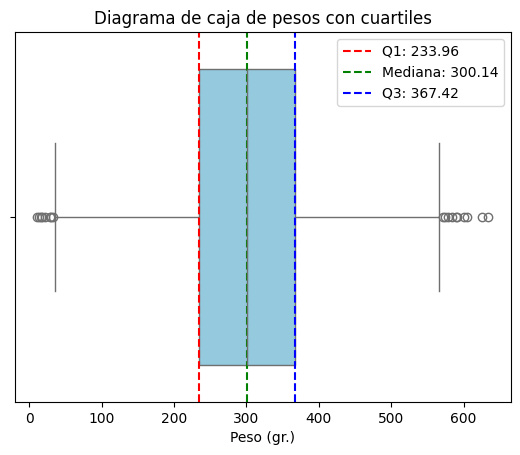

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["peso"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de pesos con cuartiles')
plt.xlabel('Peso (gr.)')
plt.legend()

plt.show()

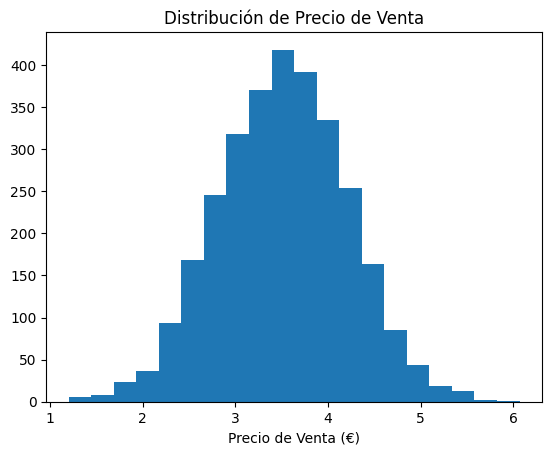

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["precio_venta"].dropna(), bins=20)
plt.title('Distribución de Precio de Venta')
plt.xlabel('Precio de Venta (€)')
plt.ylabel('')
plt.show()

In [ ]:
Q1_pv = df["precio_venta"].quantile(0.25)
Q3_pv = df["precio_venta"].quantile(0.75)
IQR_pv = Q3_pv - Q1_pv
outliers_pv = df[df["precio_venta"] > Q3_pv + 1.5 * IQR_pv]

print("Total outliers:", outliers_pv["precio_venta"].count())
print(Q1_pv)
print(Q3_pv)


Total outliers: 14
3.0501114741770543
3.989451217555593


En precio venta tenemos 14 outliers mientras que en coste inicial teníamos 3.

In [ ]:
outliers_pv_ci = pd.merge(outliers_ci, outliers_pv, on='t_id', how='inner')
outliers_pv_ci

,cliente_x,precio_venta_x,peso_x,t_id,fecha_venta_x,hora_venta_x,tipo_x,fecha_recogida_x,hora_recogida_x,lote_x,...,peso_y,fecha_venta_y,hora_venta_y,tipo_y,fecha_recogida_y,hora_recogida_y,lote_y,marca_y,coste_inicial_y,proveedor_y
0,La Gran Cosecha,5.442098,226.282124,Orange002587.png,2022/09/13,23:00,Orange,2022/09/13,14:00,U82G78M69L48N53T55J80T71,...,226.282124,2022/09/13,23:00,Orange,2022/09/13,14:00,U82G78M69L48N53T55J80T71,RicoBosque,3.408846,Semillas Innovadoras S.A.
1,EcoTienda,5.493010,309.871075,Orange001510.png,2022/09/22,23:00,Orange,2022/09/22,16:00,U82G78M69L48M53M48J80T71,...,309.871075,2022/09/22,23:00,Orange,2022/09/22,16:00,U82G78M69L48M53M48J80T71,FrutaDulce,3.438946,Fitosanitarios BioPro


2 coinciden.

Vamos a comprobar la norma que tenemos que cumplir que desde día de recogida hasta fecha venta tiene que pasar al menos un día.

In [ ]:
df['fecha_venta'] = pd.to_datetime(df['fecha_venta'], errors='coerce')
df['fecha_recogida'] = pd.to_datetime(df['fecha_recogida'], errors='coerce')

tiempo_diferencia = df['fecha_venta'] - df['fecha_recogida']

al_menos_un_dia = (tiempo_diferencia >= pd.Timedelta(days=1)).all()

print(f"Es verdad que desde fecha_recogida y fecha_venta pasa al menos un día? {al_menos_un_dia}")

Es verdad que desde fecha_recogida y fecha_venta pasa al menos un día? False


In [ ]:
tiempo_diferencia.min()

Timedelta('-29 days +00:00:00')

In [ ]:
tiempo_diferencia.sort_values()

,0
962,-29 days
2039,-29 days
1389,-29 days
925,-28 days
1367,-27 days
...,...
1274,NaT
1316,NaT
1399,NaT
1516,NaT


Nos encontramos con datos negativos.
Sabemos que no se pueden realizar reservas antes de la recogida por lo que es un error y la norma no se cumple.

**No en todos los productos pasan 24 horas mínimo desde la recogida hasta la venta.**

El peso está en gramos. Vamos a comprobar si a cada proveedor no se le venden más de 100Kg de fruta en un solo día.

In [ ]:
venta_dia = df.groupby(['proveedor', 'fecha_venta'])['peso'].sum()

mayor_100kg = (venta_dia > 100000).any()

print(f"¿Algún proveedor recibe más de 100 kg en un solo día? {mayor_100kg}")

¿Algún proveedor recibe más de 100 kg en un solo día? False


No se le vende más de 100Kg de naranjas a un proveedor en un solo día.

**En el caso de las naranjas esta norma se cumple.**

Vamos a comprobar que 1 lote solo contiene un tipo de fruta y de una sola marca.

In [ ]:
lote_check = df.groupby('lote').agg({
    'tipo': 'nunique',
    'marca': 'nunique'
}).reset_index()

tipo_check = lote_check[lote_check['tipo'] > 1]
marca_check = lote_check[lote_check['marca'] > 1]

if tipo_check.empty and marca_check.empty:
    print("Cada lote solo contiene un tipo de fruta o una marca.")
else:
    print("Norma incumplida:")
    if not tipo_check.empty:
        print("\nLotes con más de un tipo de fruta:")
        display(tipo_check)
    if not marca_check.empty:
        print("\nLotes con más de una marca:")
        display(marca_check)

Cada lote solo contiene un tipo de fruta o una marca.


En un solo lote con las naranjas no encontramos más de un tipo de fruta ni más de una marca.

**Con las naranjas esta norma se cumple.**

In [ ]:
df = df.dropna(subset=['coste_inicial', 'precio_venta'])
df = df[df['coste_inicial'] != 0]
df['rentabilidad'] = ((df['precio_venta'] - df['coste_inicial']) / df['coste_inicial']) * 100

df_lote = df.groupby('lote', as_index=False)[['coste_inicial', 'precio_venta', 'rentabilidad']].mean()

corr = df_lote[['coste_inicial', 'precio_venta', 'rentabilidad']].corr()
display(corr)

,coste_inicial,precio_venta,rentabilidad
coste_inicial,1.000000,0.706011,-0.612882
precio_venta,0.706011,1.000000,0.056809
rentabilidad,-0.612882,0.056809,1.000000


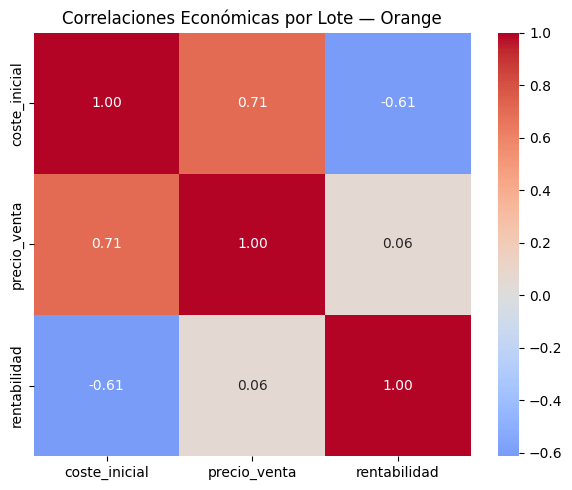

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlaciones Económicas por Lote — Orange')
plt.tight_layout()
plt.show()

               precio_venta  coste_inicial      peso
precio_venta       1.000000       0.706011 -0.002305
coste_inicial      0.706011       1.000000 -0.018509
peso              -0.002305      -0.018509  1.000000


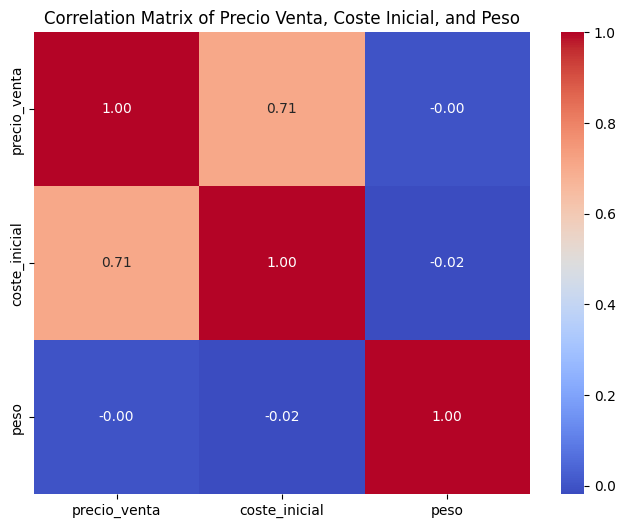

In [ ]:
correlation_matrix = df[['precio_venta', 'coste_inicial', 'peso']].corr()

print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Precio Venta, Coste Inicial, and Peso')
plt.show()

Las correlaciones entre coste inicial y precio venta son de 0.71 mientras que no encontramos correlación entre precio venta y peso ni entre coste inicial y peso. Creemos que esto debería estar totalmente relacionado ya que a mayor peso deberia tener un coste o precio mayor. Esto refuerza la teoria que exponemos de que los pesos no son correctos.

Aqui dejamos el analisis de las naranjas y pasamos a analizar la siguiente fruta.